In [44]:
import xarray as xr

ds = xr.open_dataset("output/data/baselines/COSMO-E/verif_aggregated.nc")
ds2 = xr.open_dataset(
    "output/data/runs/d0846032fc7248a58b089cbe8fa4c511/verif_aggregated.nc"
)
print(ds)

<xarray.Dataset> Size: 160MB
Dimensions:                (source: 2, lead_time: 11, y: 390, x: 582)
Coordinates:
  * source                 (source) <U16 128B 'COSMO-E' 'COSMO-E analysis'
  * lead_time              (lead_time) timedelta64[ns] 88B 0 days 00:00:00 .....
  * y                      (y) int64 3kB 0 1 2 3 4 5 ... 384 385 386 387 388 389
  * x                      (x) int64 5kB 0 1 2 3 4 5 ... 576 577 578 579 580 581
    latitude               (y, x) float64 2MB ...
    longitude              (y, x) float64 2MB ...
    latitudes              (y, x) float64 2MB ...
    longitudes             (y, x) float64 2MB ...
Data variables: (12/112)
    T_2M.BIAS              (source, lead_time) float64 176B ...
    T_2M.RMSE              (source, lead_time) float64 176B ...
    T_2M.MAE               (source, lead_time) float64 176B ...
    T_2M.STDE              (source, lead_time) float64 176B ...
    T_2M.CORR              (source, lead_time) float64 176B ...
    T_2M.R2              

In [45]:
print(ds2)

<xarray.Dataset> Size: 94MB
Dimensions:                (source: 2, lead_time: 11, y: 390, x: 582)
Coordinates:
  * source                 (source) <U16 128B 'COSMO-E analysis' 'M-1 forecas...
  * lead_time              (lead_time) timedelta64[ns] 88B 0 days 00:00:00 .....
  * y                      (y) int64 3kB 0 1 2 3 4 5 ... 384 385 386 387 388 389
  * x                      (x) int64 5kB 0 1 2 3 4 5 ... 576 577 578 579 580 581
    lat                    (y, x) float64 2MB ...
    lon                    (y, x) float64 2MB ...
    latitudes              (y, x) float64 2MB ...
    longitudes             (y, x) float64 2MB ...
Data variables: (12/128)
    U_10M.BIAS             (source, lead_time) float32 88B ...
    U_10M.RMSE             (source, lead_time) float32 88B ...
    U_10M.MAE              (source, lead_time) float32 88B ...
    U_10M.STDE             (source, lead_time) float32 88B ...
    U_10M.CORR             (source, lead_time) float32 88B ...
    U_10M.R2             

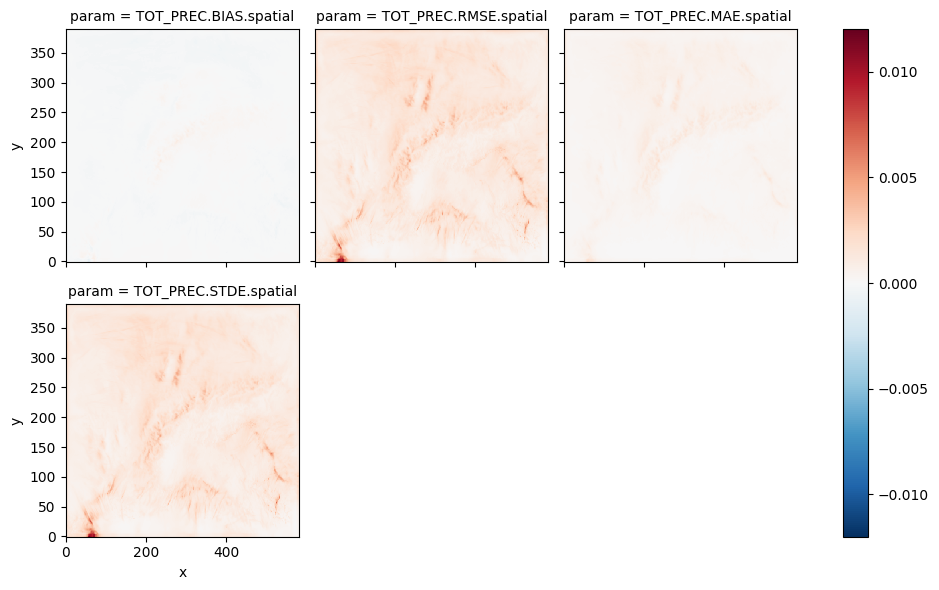

In [46]:
spat = [
    d
    for d in ds.data_vars
    if ".spatial" in d and "TOT_PREC" in d and "CORR" not in d and "R2" not in d
]
ds[spat].isel(source=0).to_array("param").plot(col="param", col_wrap=3)

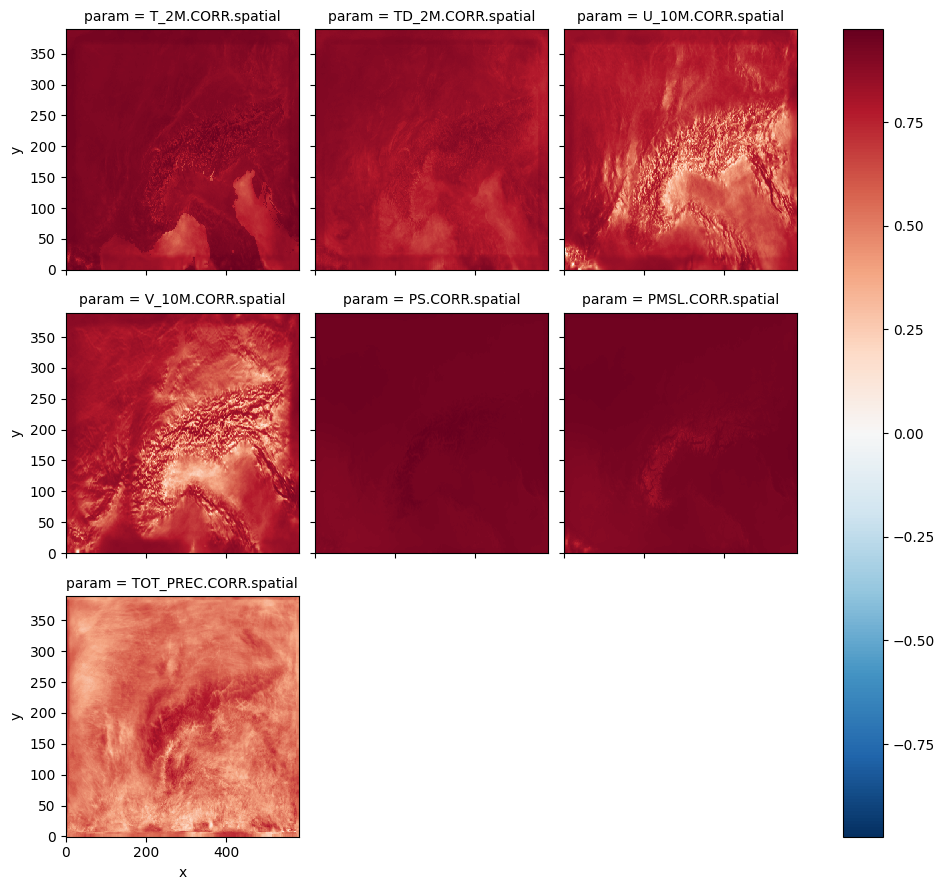

In [47]:
spat = [d for d in ds.data_vars if ".spatial" in d and "CORR" in d]
ds[spat].isel(source=0).to_array("param").plot(col="param", col_wrap=3)

In [ ]:
spat_vars = [d for d in ds.data_vars if ".spatial" in d]
combined = xr.merge([ds[spat_vars], ds2[spat_vars]]).drop_sel(source="COSMO-E analysis")

KeyError: "No variable named 'U_10.RMSE.spatial'. Did you mean one of ('U_10M.RMSE.spatial', 'V_10M.RMSE.spatial', 'U_10M.STDE.spatial', 'U_10M.R2.spatial', 'U_10M.MAE.spatial', 'T_2M.RMSE.spatial', 'PS.RMSE.spatial', 'V_10M.STDE.spatial', 'U_10M.BIAS.spatial', 'TD_2M.RMSE.spatial')?"

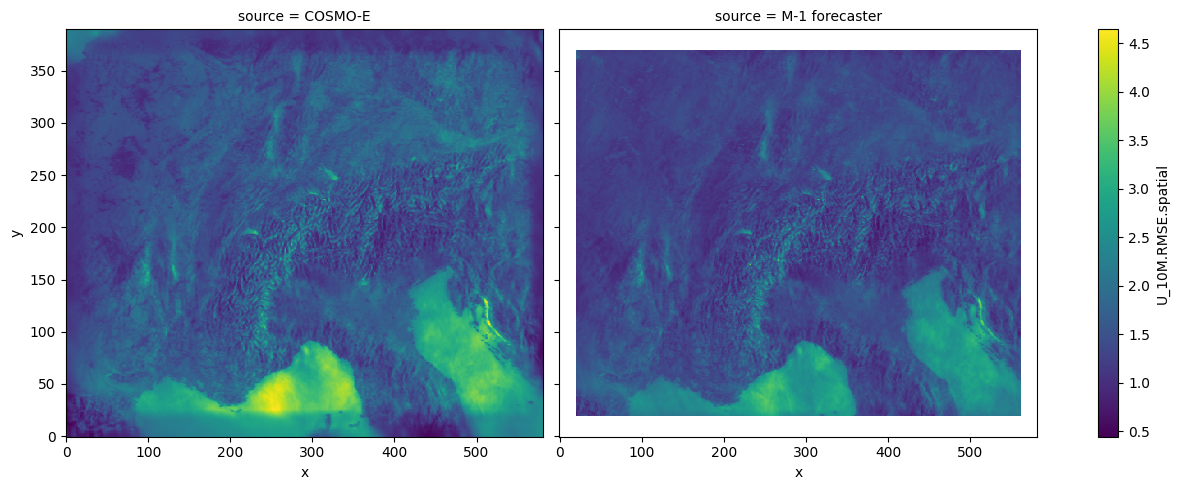

In [67]:
combined["U_10M.RMSE.spatial"].plot(col="source", figsize=(13, 5))

In [72]:
from meteodatalab import data_source, grib_decoder

fds = data_source.FileDataSource(
    datafiles=[
        "/scratch/mch/bhendj/evalml/output/data/runs/d0846032fc7248a58b089cbe8fa4c511/202001081200/grib/202001081200_012.grib"
    ]
)
ds = grib_decoder.load(fds, "TOT_PREC")
ds

{'TOT_PREC': <xarray.DataArray (ref_time: 1, lead_time: 1, y: 390, x: 582)> Size: 908kB
 array([[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
 Coordinates:
   * ref_time    (ref_time) datetime64[ns] 8B 2020-01-08T12:00:00
   * lead_time   (lead_time) timedelta64[ns] 8B 12:00:00
     lat         (y, x) float64 2MB 42.18 42.18 42.18 42.19 ... 50.13 50.13 50.13
     lon         (y, x) float64 2MB 0.8064 0.8331 0.8598 ... 17.43 17.46 17.49
     valid_time  (ref_time, lead_time) datetime64[ns] 8B 2020-01-09
 Dimensions without coordinates: y, x
 Attributes:
     metadata:     <earthkit.data.core.metadata.WrappedMetadata object at 0x14...
     parameter:    {'centre': 'lssw', 'paramId': 500041, 'shortName': 'TOT_PRE...
     geography: 

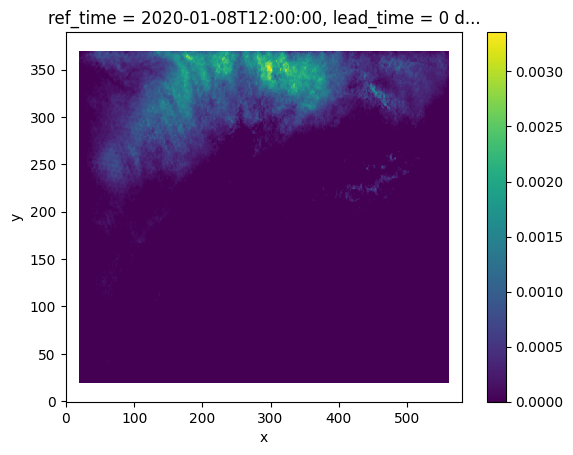

In [73]:
ds["TOT_PREC"].isel(ref_time=0, lead_time=0).plot()

In [3]:
from pathlib import Path

vfiles = Path("output/data/runs/d0846032fc7248a58b089cbe8fa4c511").glob("*/verif.nc")
all = xr.open_mfdataset(vfiles)
all

NameError: name 'xr' is not defined

In [2]:
spat_vars = [d for d in all.data_vars if "spatial" in d]

tt = all[spat_vars].isel(x=0, y=0).sel(source="M-1 forecaster")
tt

AttributeError: 'builtin_function_or_method' object has no attribute 'data_vars'

<xarray.DataArray 'TOT_PREC.MSE.spatial' (ref_time: 107)> Size: 428B
array([4.1559041e-08, 4.1559041e-08, 4.1559037e-08, 4.1559037e-08,
       4.1559037e-08, 4.1559037e-08, 4.1559037e-08, 2.5796286e-08,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.3948846e-13,
       3.6683709e-09, 3.6683709e-09, 3.6683709e-09, 3.7120720e-09,
       4.3134754e-09, 4.3134754e-09, 4.3134754e-09, 4.3134754e-09,
       7.0208594e-09, 1.3852770e-07, 3.5018175e-07, 7.8686674e-07,
       4.8436209e-06, 6.0872053e-06, 6.0866037e-06, 6.0866037e-06,
       6.0866041e-06, 6.0867960e-06, 6.1070868e-06, 5.9762619e-06,
       5.7609404e-06, 5.3245694e-06, 1.2679268e-06, 2.4298780e-08,
       2.4298767e-08, 2.4298757e-08, 2.8577308e-08, 2.8655318e-08,
       5.6610765e-09, 5.7389018e-09, 5.7389018e-09, 5.4251030e-09,
       5.3129510e-09, 5.3129510e-09, 5.3129510e-09, 5.3129510e-09,
       1.0339803e-09, 7.6401674e-10, 7.6023027e-10, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       6.3948846e-13, 6.3948846e-13, 2.3928947e-11, 2.3928947e-11,
       2.3928947e-11, 2.3928947e-11, 2.3928947e-11, 2.8197533e-10,
       3.5006523e-10, 3.3096221e-08, 4.8979039e-08, 4.8979054e-08,
       4.8955762e-08, 4.8955762e-08, 4.8955762e-08, 4.8955762e-08,
       4.8955762e-08, 4.8697718e-08, 4.8629623e-08, 1.6289619e-08,
       4.2573731e-10, 4.2572595e-10, 4.2572595e-10, 4.2572595e-10,
       4.2572595e-10, 4.2572595e-10, 4.2572595e-10, 4.2572595e-10,
       4.2572595e-10, 1.9579716e-11, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0231815e-13, 1.4779288e-13,
       1.4779288e-13, 1.4779288e-13, 1.5916157e-13, 1.5916157e-13,
       1.5916157e-13, 1.5347723e-12, 1.2321635e-09, 1.3129832e-08,
       1.3138200e-08, 4.1968684e-07, 5.7255082e-05, 5.7255082e-05,
       5.7300011e-05, 5.7308796e-05, 5.7308811e-05], dtype=float32)
Coordinates:
    source      <U16 64B 'M-1 forecaster'
  * ref_time    (ref_time) datetime64[ns] 856B 2020-01-06T12:00:00 ... 2020-0...
    y           int64 8B 0
    x           int64 8B 0
    lat         float64 8B 42.18
    lon         float64 8B 0.8064
    latitudes   float64 8B 42.18
    longitudes  float64 8B 0.8064

In [58]:
## get topography
ds_topo = xr.open_dataset("/store_new/mch/msopr/ml/COSMO-E/FCST20.zarr")
ds_topo

topo = ds_topo["PS"].isel(forecast_reference_time=0, step=0)
combined["topo"] = topo

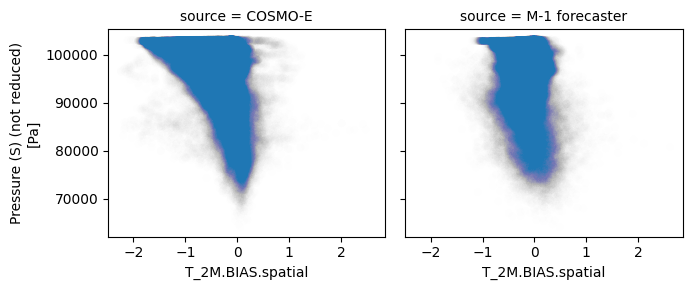

In [64]:
combined.plot.scatter(
    x="T_2M.BIAS.spatial",
    y="topo",
    col="source",
    col_wrap=3,
    alpha=0.005,
    edgecolors="none",
)